In [103]:
import pandas as pd

df_1 = pd.read_csv(r"C:\Users\ywang\Downloads\trackingthesun2018_data_public_4-oct-2018\TrackingtheSun2018_Data_Public_4-Oct-2018_p1.csv",low_memory=False)
df_2 = pd.read_csv(r"C:\Users\ywang\Downloads\trackingthesun2018_data_public_4-oct-2018\TrackingtheSun2018_Data_Public_4-Oct-2018_p2.csv",encoding = "ISO-8859-1",low_memory=False)


In [115]:
#df_1: the number of PV projects
f_1 = df_1.groupby('State').count().reset_index()
state_1 = f_1[['State','Data Provider']]
state_1

,State,Data Provider
0,AR,103
1,AZ,114167
2,CA,585730


In [116]:
#df_2: the number of PV projects
f_2 = df_2.groupby('State').count().reset_index()
state_2 = f_2[['State','Data Provider']]
#Merge two dataframe
state_tot = pd.merge(state_1, state_2, how = "outer", on = "State") 


In [117]:
state_tot['Project Count'] = state_tot['Data Provider_x'].fillna(0)+state_tot['Data Provider_y'].fillna(0)
state_tot_count = state_tot.drop(['Data Provider_x', 'Data Provider_y'], axis=1)
state_tot_count = state_tot_count.sort_values(by=['Project Count'], ascending=False).reset_index(drop=True)
state_tot_count

,State,Project Count
0,CA,746893.0
1,AZ,114167.0
2,MA,79031.0
3,NY,78321.0
4,CO,40714.0
5,CT,24372.0
6,UT,19177.0
7,TX,18829.0
8,NM,15515.0
9,MD,11562.0


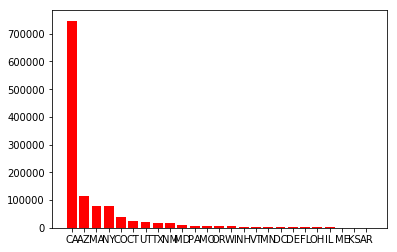

In [158]:
import matplotlib.pyplot as plt  # To visualize
x1 = state_tot_count['State']
y1 = state_tot_count['Project Count']
#plt.scatter(x, y)
plt.bar(x1, y1, color='red')
plt.show()

In [128]:
#df_1: the sum of PV system size
s_1 = df_1.groupby('State').sum().reset_index()
sys_1 = s_1[['State','System Size']]
#df_2: the sum of PV system size
s_2 = df_2.groupby('State').sum().reset_index()
sys_2 = s_2[['State','System Size']]
#Merge two dataframe
state_tot_sys = pd.merge(sys_1, sys_2, how = "outer", on = "State") 
state_tot_sys['Total System Size'] = state_tot_sys['System Size_x'].fillna(0)+state_tot_sys['System Size_y'].fillna(0)
state_sum_sys = state_tot_sys.drop(['System Size_x', 'System Size_y'], axis=1)
state_sum_sys = state_sum_sys.sort_values(by=['Total System Size'], ascending=False).reset_index(drop=True)
state_sum_sys

,State,Total System Size
0,AZ,1.390217e+07
1,CA,6.862631e+06
2,MA,2.096598e+06
3,UT,1.073509e+06
4,NY,9.722522e+05
5,CO,3.450649e+05
6,CT,2.268829e+05
7,TX,1.714909e+05
8,NM,1.459418e+05
9,PA,1.349937e+05


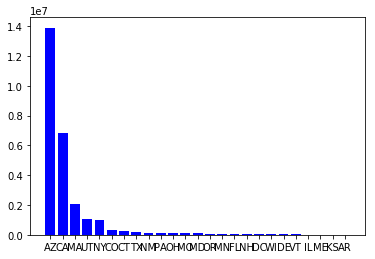

In [159]:

x2 = state_sum_sys['State']
y2 = state_sum_sys['Total System Size'] #system size in kW
#plt.scatter(x, y)
plt.bar(x2, y2, color='blue')
plt.show()

In [149]:
df_ave = pd.merge(state_sum_sys,state_tot_count,how='outer',on='State')
df_ave['Average Project Size']=df_ave['Total System Size']/df_ave['Project Count']

In [156]:
df_ave = df_ave.sort_values(by='Average Project Size',ascending=False).reset_index(drop=True)
df_ave

,State,Total System Size,Project Count,Average Project Size
0,AZ,1.390217e+07,114167.0,121.770489
1,UT,1.073509e+06,19177.0,55.978983
2,OH,1.281212e+05,2483.0,51.599353
3,MA,2.096598e+06,79031.0,26.528805
4,FL,4.849161e+04,2566.0,18.897745
5,PA,1.349937e+05,7333.0,18.409070
6,MO,1.136823e+05,7250.0,15.680317
7,MN,4.858750e+04,3770.0,12.887931
8,DC,4.364398e+04,3431.0,12.720483
9,NY,9.722522e+05,78321.0,12.413685


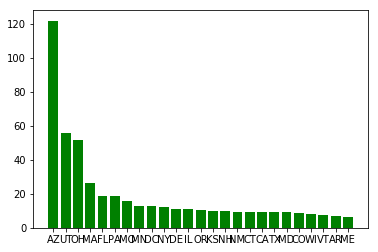

In [160]:
x3 = df_ave['State']
y3 = df_ave['Average Project Size'] #system size per project in kW
#plt.scatter(x, y)
plt.bar(x3, y3, color='green')
plt.show()